# Chapter 1
### 1. Setup

In [51]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

### 2. Load data

In [2]:
# Path of the file to read
fifa_filepath = "input/fifa.csv"

# Read the file into a variable fifa_data
fifa_data = pd.read_csv(fifa_filepath, index_col="Date", parse_dates=True)


### 3. Plot data

<Axes: xlabel='Date'>

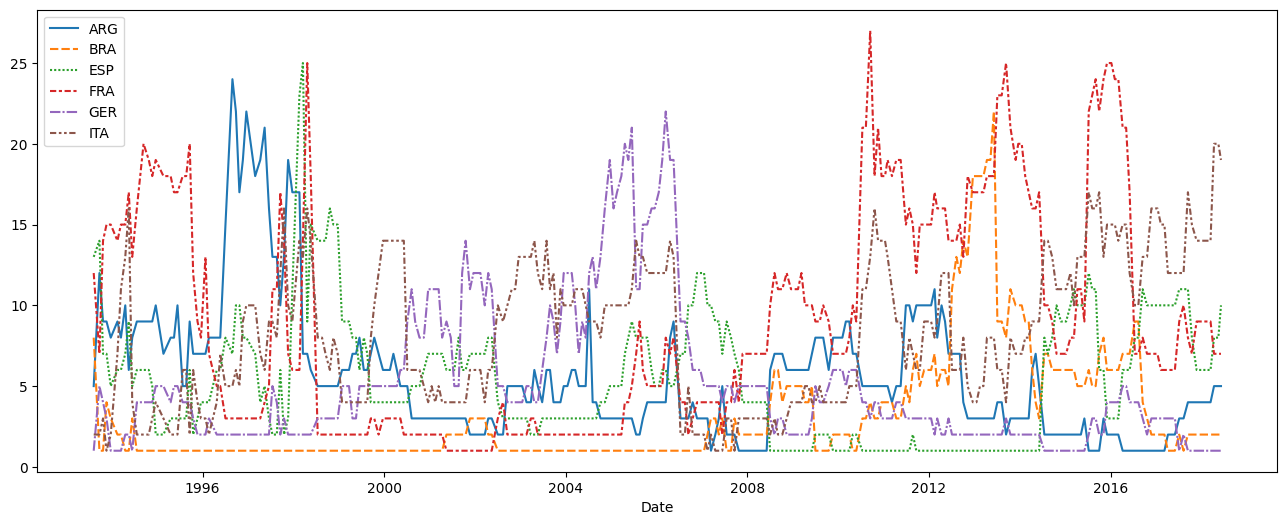

In [3]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time
sns.lineplot(data=fifa_data)

# Chapter 2
### 1. Load the data

In [3]:
# Path of the file to read
museum_filepath = "input/museum_visitors.csv"

# Fill in the line below to read the file into a variable museum_data
museum_data = pd.read_csv(museum_filepath, index_col='Date', parse_dates=True)


### 2. Review the data

In [6]:
museum_data.tail()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2018-07-01,23136,4191,2620,4718
2018-08-01,20815,4866,2409,3891
2018-09-01,21020,4956,2146,3180
2018-10-01,19280,4622,2364,3775
2018-11-01,17163,4082,2385,4562


In [6]:
# Fill in the line below: How many visitors did the Chinese American Museum 
# receive in July 2018?
ca_museum_jul18 = museum_data['Chinese American Museum']['2018-07-01']

# Fill in the line below: In October 2018, how many more visitors did Avila 
# Adobe receive than the Firehouse Museum?
avila_oct18 = museum_data['Avila Adobe']['2018-10-01'] - museum_data['Firehouse Museum']['2018-10-01']


### 3. Convince the museum board

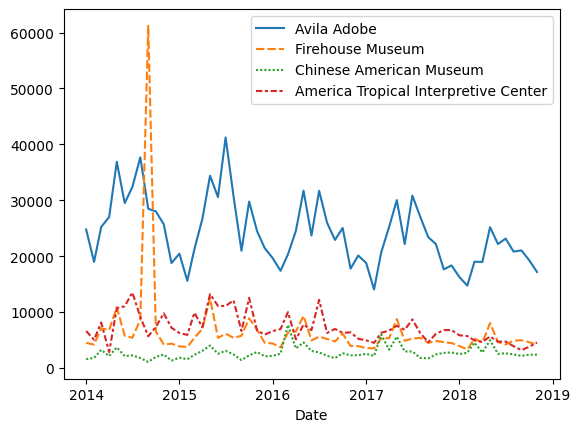

In [7]:
# Line chart showing the number of visitors to each museum over time
sns.lineplot(data=museum_data) # Your code here

plt.show()

### 4. Assess seasonality

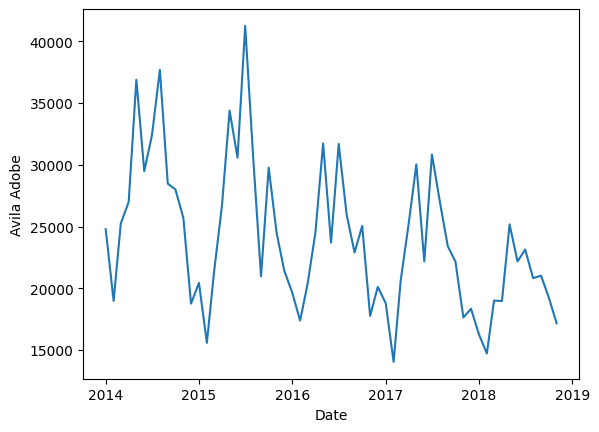

In [8]:
# Line plot showing the number of visitors to Avila Adobe over time
sns.lineplot(data=museum_data['Avila Adobe']) # Your code here

plt.show()

In [9]:
museum_data.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


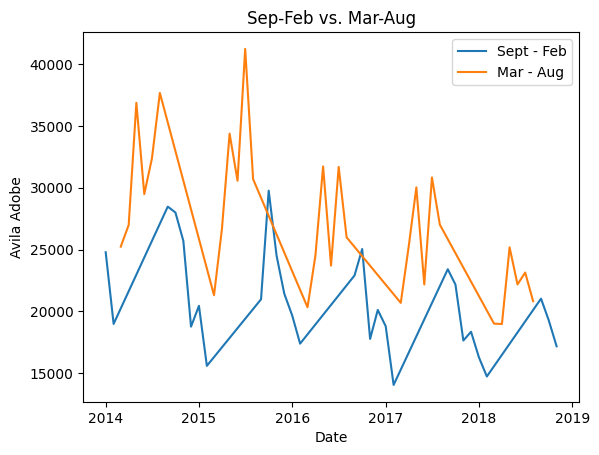

In [12]:
# Extract data for the specified months
selected_months_sept_feb = museum_data['Avila Adobe'].loc[museum_data.index.month.isin([9, 10, 11, 12, 1, 2])]
selected_months_march_aug = museum_data['Avila Adobe'].loc[museum_data.index.month.isin([3,4,5,6,7,8])]
sns.lineplot(data=selected_months_sept_feb, label='Sept - Feb') # Your code here
sns.lineplot(data=selected_months_march_aug, label='Mar - Aug')
plt.title('Sep-Feb vs. Mar-Aug')
plt.legend()
plt.show()

# Chapter 3. Bar Charts and Heatmap


### 1. Load the data

In [13]:
# Path of the file to read
ign_filepath = "input/ign_scores.csv"

# Fill in the line below to read the file into a variable ign_data
ign_data = pd.read_csv(ign_filepath, index_col='Platform')

In [29]:
ign_data.index

Index(['Dreamcast', 'Game Boy Advance', 'Game Boy Color', 'GameCube',
       'Nintendo 3DS', 'Nintendo 64', 'Nintendo DS', 'Nintendo DSi', 'PC',
       'PlayStation', 'PlayStation 2', 'PlayStation 3', 'PlayStation 4',
       'PlayStation Portable', 'PlayStation Vita', 'Wii', 'Wireless', 'Xbox',
       'Xbox 360', 'Xbox One', 'iPhone'],
      dtype='object', name='Platform')

### 2. Review the data

In [34]:
# Fill in the line below: What is the highest average score received by PC games,
# for any genre?
high_score = ign_data.loc['PC'].max()
print(high_score)

# Fill in the line below: On the Playstation Vita platform, which genre has the 
# lowest average score? Please provide the name of the column, and put your answer 
# in single quotes (e.g., 'Action', 'Adventure', 'Fighting', etc.)
worst_genre = ign_data.loc['PlayStation Vita'].idxmin()
print(worst_genre)

7.759930313588847
Simulation


### 3. Which platform is the best

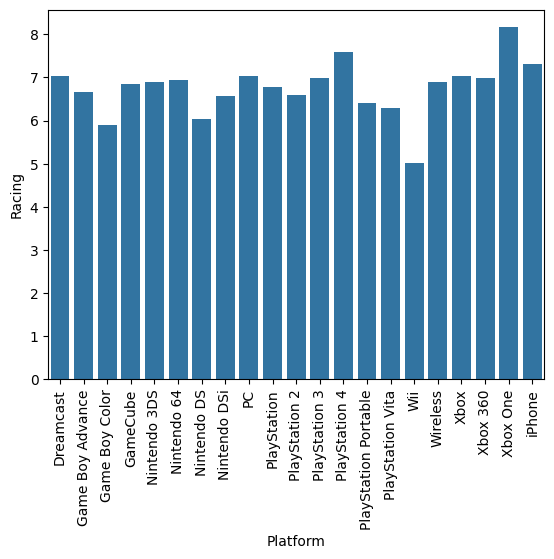

In [36]:
# Bar chart showing average score for racing games by platform
sns.barplot(x=ign_data.index, y=ign_data['Racing']) # Your code here
plt.xticks(rotation=90)  # Adjust the angle as needed

plt.show()

### 4. All possible combinations

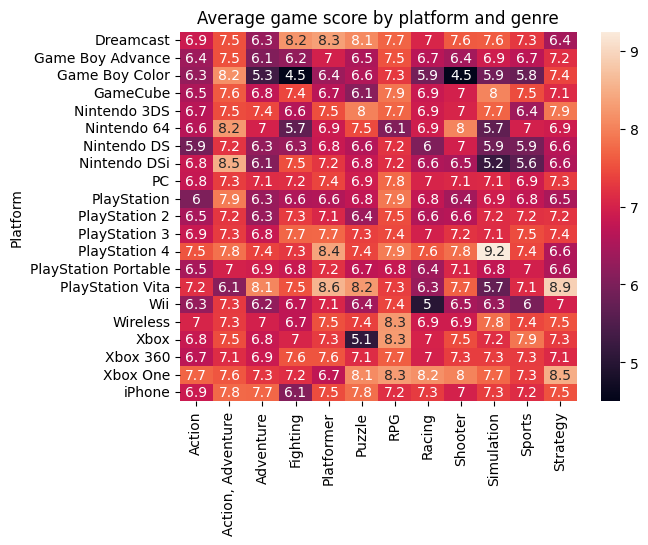

In [37]:
# Heatmap showing average game score by platform and genre
sns.heatmap(data=ign_data, annot=True) # Your code here
plt.title('Average game score by platform and genre')

# Check your answer
plt.show()

In [38]:
# Which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings?
highest_index = ign_data.stack().idxmax()
highest_value = ign_data.loc[highest_index[0], highest_index[1]]

lowest_index = ign_data.stack().idxmin()
lowest_value = ign_data.loc[lowest_index[0], lowest_index[1]]

print(f"The highest score: {highest_value} in {highest_index}")
print(f"The lowest score: {lowest_value} in {lowest_index}")

The highest score: 9.25 in ('PlayStation 4', 'Simulation')
The lowest score: 4.5 in ('Game Boy Color', 'Fighting')


# Chapter 4. Scatter plots

## 1. Load the data

In [40]:
# Path of the file to read
candy_filepath = "input/candy.csv"

# Fill in the line below to read the file into a variable candy_data
candy_data = pd.read_csv(candy_filepath, index_col='id')

## 2. Examine the data


In [41]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


In [44]:
candy_data.iloc[candy_data[candy_data.competitorname.isin(['3 Musketeers', 'Almond Joy'])]['winpercent'].idxmax()]['competitorname']

'3 Musketeers'

In [45]:
candy_data.iloc[candy_data[candy_data.competitorname.isin(['Air Heads', 'Baby Ruth'])]['sugarpercent'].idxmax()]['competitorname']

'Air Heads'

In [46]:
# Fill in the line below: Which candy was more popular with survey respondents:
# '3 Musketeers' or 'Almond Joy'?  (Please enclose your answer in single quotes.)
more_popular = candy_data.iloc[candy_data[candy_data.competitorname.isin(['3 Musketeers', 'Almond Joy'])]['winpercent'].idxmax()]['competitorname']

# Fill in the line below: Which candy has higher sugar content: 'Air Heads'
# or 'Baby Ruth'? (Please enclose your answer in single quotes.)
more_sugar = candy_data.iloc[candy_data[candy_data.competitorname.isin(['Air Heads', 'Baby Ruth'])]['sugarpercent'].idxmax()]['competitorname']

### 3. Role of sugar

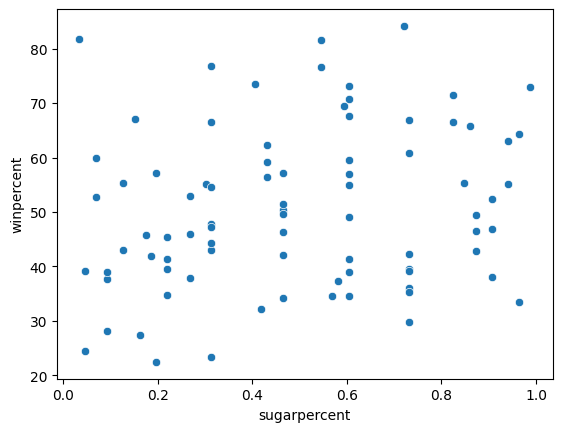

In [47]:
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
sns.scatterplot(x='sugarpercent', y='winpercent', data=candy_data) # Your code here
plt.show()

## 4. A closer look with the regression line

slope degree: 88.97882021763027


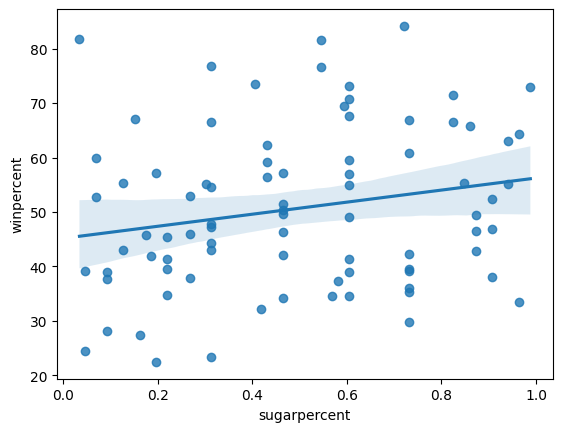

In [55]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
reg = sns.regplot(x='sugarpercent', y='winpercent', data=candy_data) # Your code here
slope = reg.get_lines()[0].get_data()[1][-1]  # Get the slope from the last point of the line
# Calculate the slope direction degree (angle)
slope_degree = np.degrees(np.arctan(slope))
print(f'slope degree: {slope_degree}')
plt.show()

## 5. Chocolate

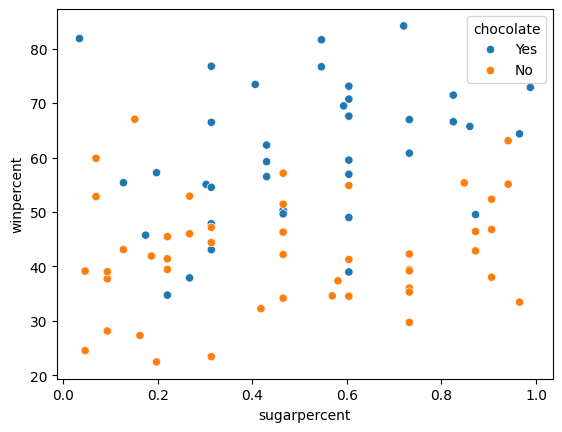

In [56]:
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
sns.scatterplot(x='sugarpercent', y='winpercent', data=candy_data, hue='chocolate')

plt.show()

Slope degree for chocolates: 89.16295858230019
Slope degree for non-chocolates: 88.72050771593564


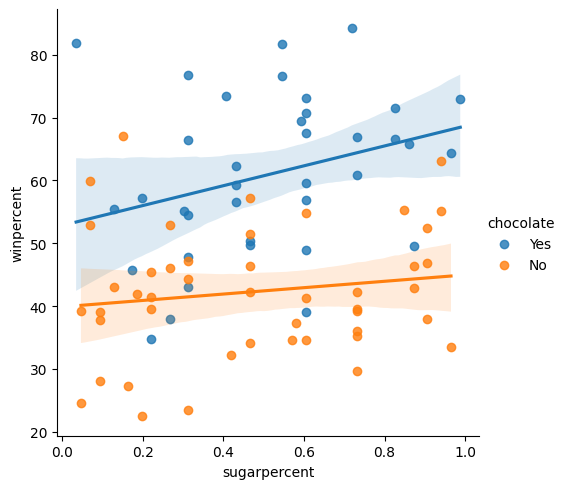

In [63]:
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
reg = sns.lmplot(x='sugarpercent', y='winpercent', data=candy_data, hue='chocolate')

# Get the slope of the regression line for chocolates
chocolate_slope = reg.axes[0,0].get_lines()[0].get_data()[1][-1]
chocolate_slope_degree = np.degrees(np.arctan(chocolate_slope))

# Get the slope of the regression line for non-chocolates
non_chocolate_slope = reg.axes[0,0].get_lines()[1].get_data()[1][-1]
non_chocolate_slope_degree = np.degrees(np.arctan(non_chocolate_slope))

# Print the slope direction degrees for both lines
print(f"Slope degree for chocolates: {chocolate_slope_degree}")
print(f"Slope degree for non-chocolates: {non_chocolate_slope_degree}")
plt.show()

## 7. Everyone loves chocolate

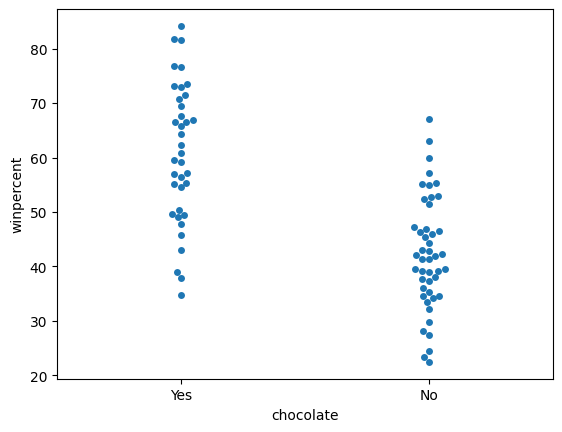

In [64]:
# Create a categorical scatter plot to highlight the relationship between 'chocolate' and 'winpercent'. Put 'chocolate' on the (horizontal) x-axis, and 'winpercent' on the (vertical) y-axis.

# Scatter plot showing the relationship between 'chocolate' and 'winpercent'
sns.swarmplot(x='chocolate', y='winpercent', data=candy_data) # Your code here

plt.show()


# Chapter 5. Distributions
## 1. Loading data

In [65]:
# Path of the files to read
cancer_filepath = "input/cancer.csv"

# Fill in the line below to read the file into a variable cancer_data
cancer_data = pd.read_csv(cancer_filepath, index_col='Id')


## 2. Review the data

In [66]:
cancer_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [75]:
# Fill in the line below: In the first five rows of the data, what is the
# largest value for 'Perimeter (mean)'?
max_perim = cancer_data['Perimeter (mean)'].head().max()
print(max_perim)
# Fill in the line below: What is the value for 'Radius (mean)' for the tumor with Id 8510824?
mean_radius = cancer_data['Radius (mean)'].loc[8510824]
print(mean_radius)

87.46
9.504


## 3. Investigate differences


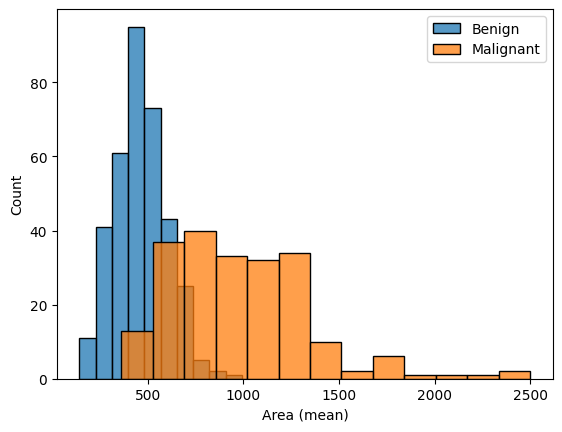

In [80]:
# Use the code cell below to create two histograms that show the distribution in values for 'Area (mean)', separately for both benign and malignant tumors

# Histograms for benign and maligant tumors
sns.histplot(cancer_data['Area (mean)'].loc[cancer_data.Diagnosis == 'B'], bins=10, label='Benign')
sns.histplot(cancer_data['Area (mean)'].loc[cancer_data.Diagnosis == 'M'], label='Malignant')
plt.legend()
plt.show()

## 4. A very useful column

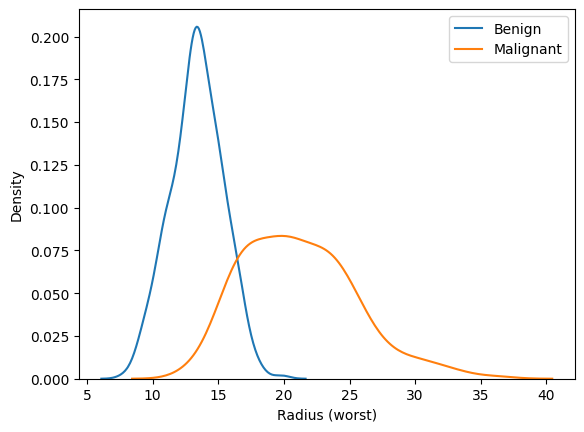

In [81]:
# KDE plots for benign and malignant tumors
sns.kdeplot(cancer_data['Radius (worst)'].loc[cancer_data.Diagnosis == 'B'], label='Benign')
sns.kdeplot(cancer_data['Radius (worst)'].loc[cancer_data.Diagnosis == 'M'], label='Malignant')
plt.legend()

plt.show()

# Chapter 6. Choosing Plot Types and Custom Styles

What have you learned?


Since it's not always easy to decide how to best tell the story behind your data, we've broken the chart types into three broad categories to help with this.

* Trends - A trend is defined as a pattern of change.
    * sns.lineplot - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.
* Relationship - There are many different chart types that you can use to understand relationships between variables in your data.
    * sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups.
    * sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers.
    * sns.scatterplot - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
    * sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.
    * sns.lmplot - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
    * sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.
* Distribution - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
    * sns.histplot - Histograms show the distribution of a single numerical variable.
    * sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
    * sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.

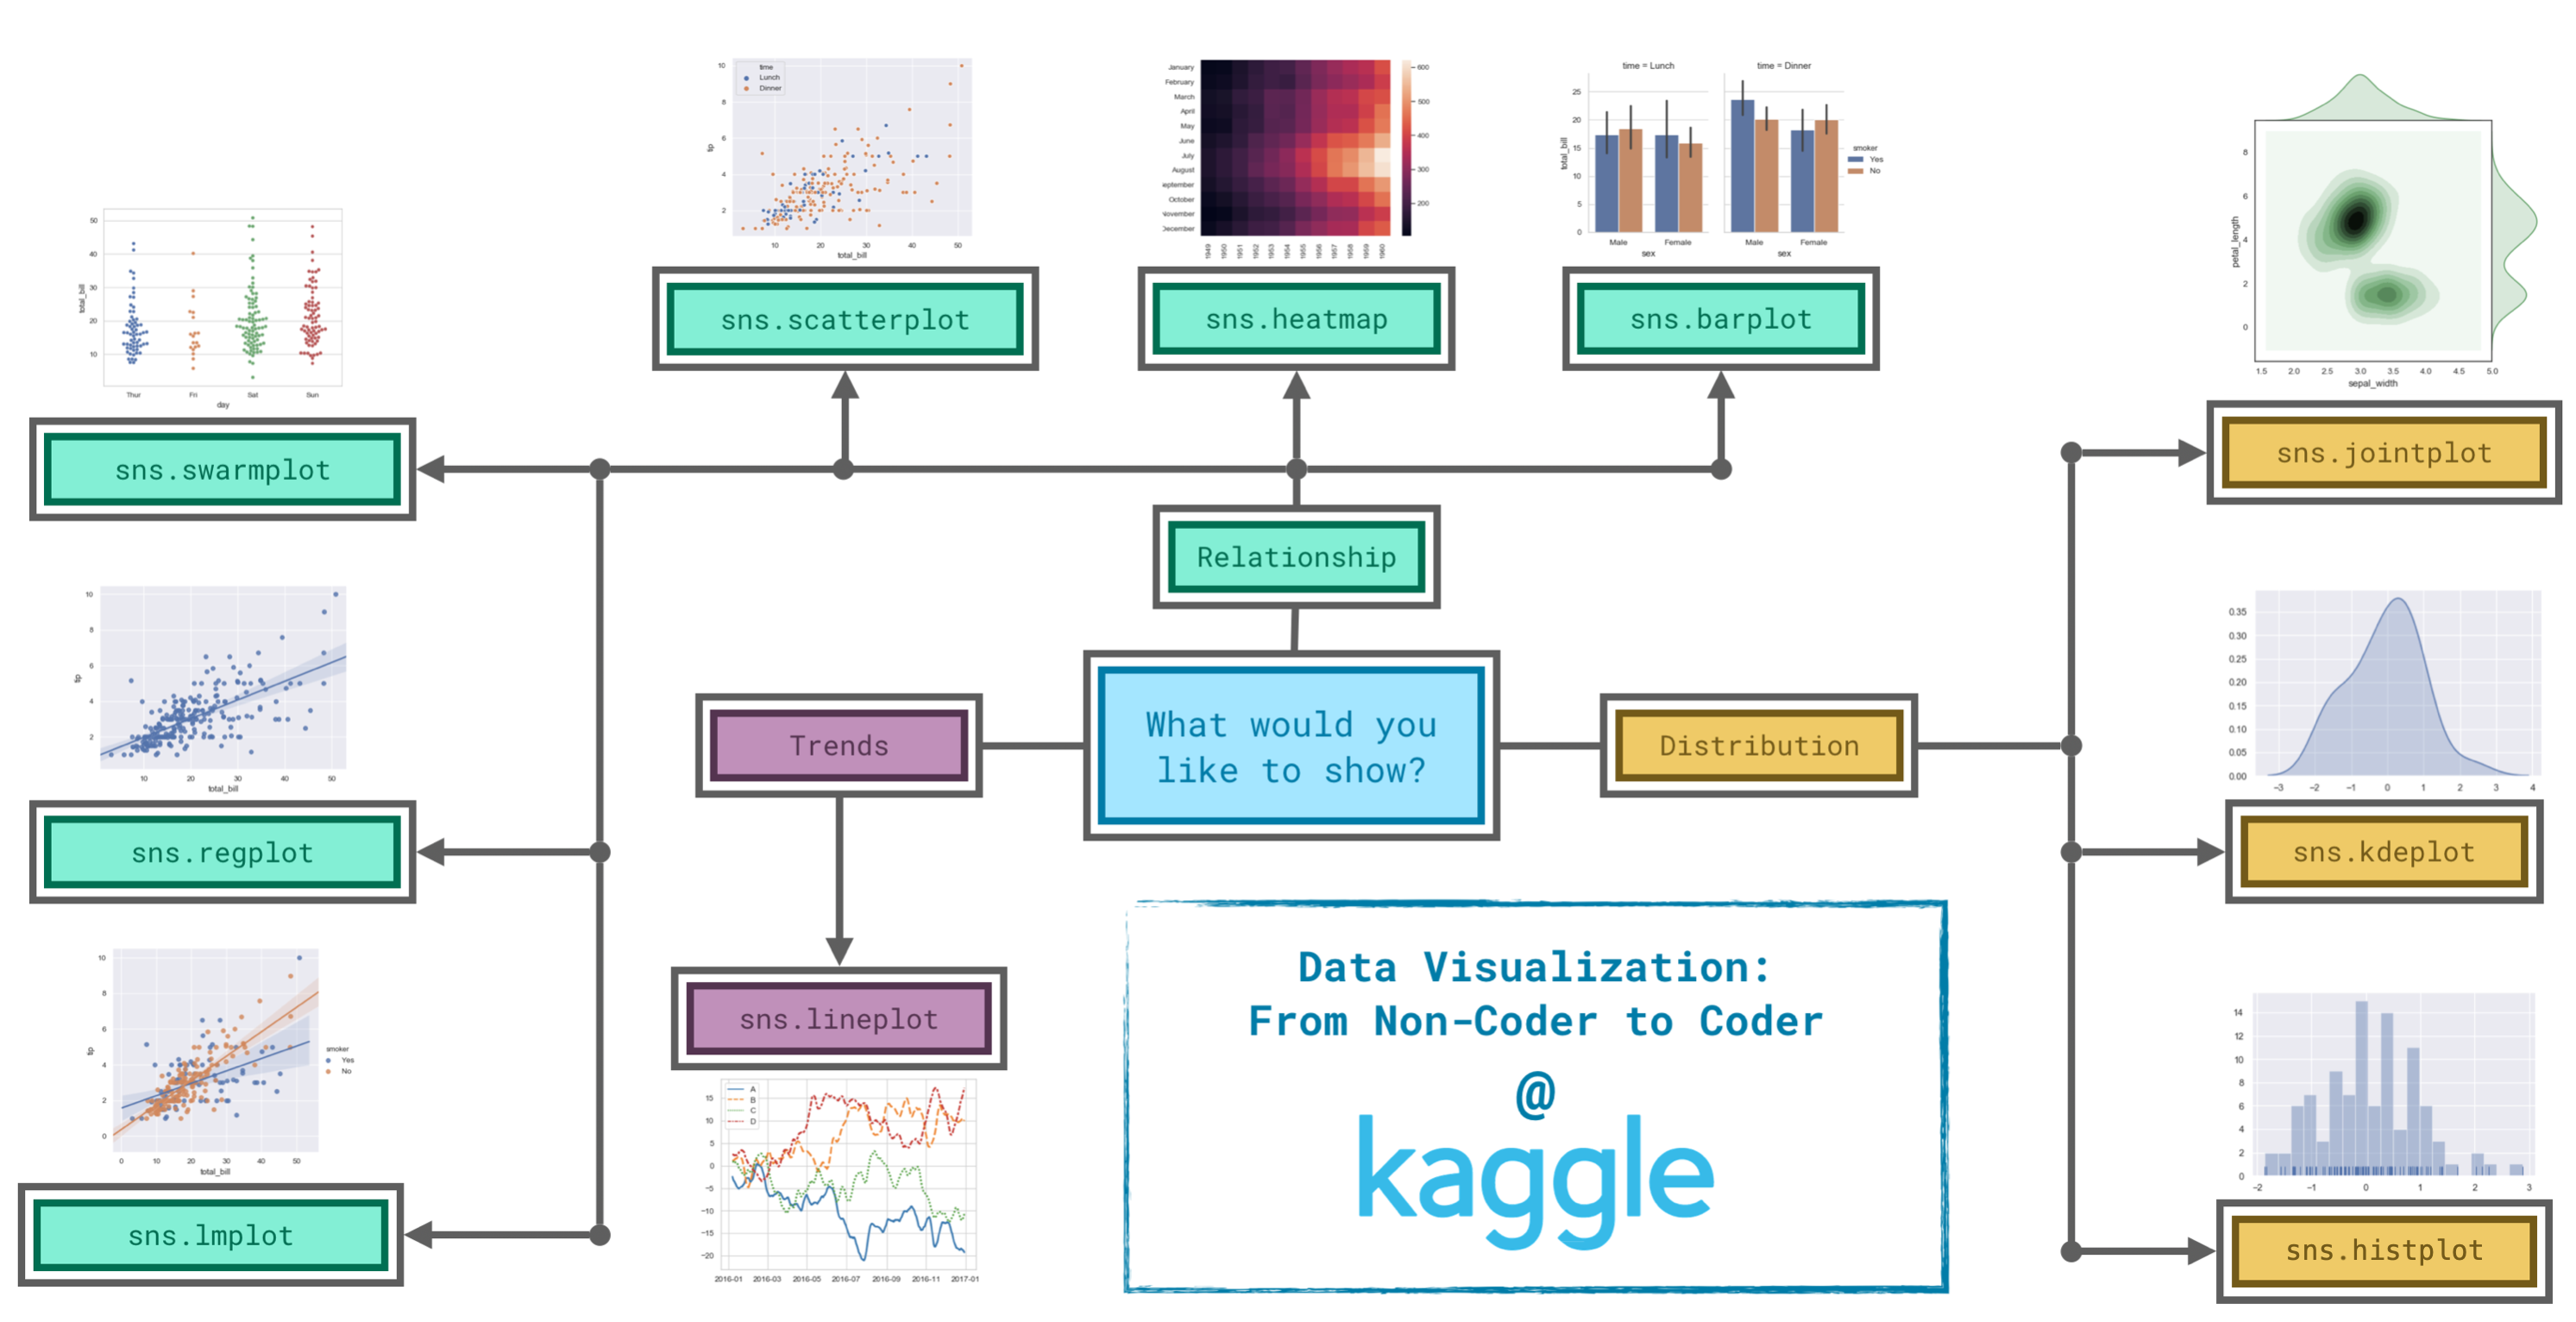

In [82]:
# Change the style of the figure to the "dark" theme
sns.set_style("dark")

## Exercise
## 1. Loading the data

In [83]:
# Path of the file to read
spotify_filepath = "input/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)

<Axes: xlabel='Date'>

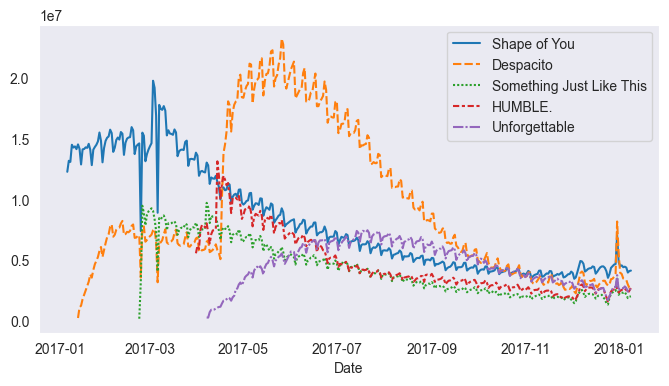

In [85]:
# Change the style of the figure
sns.set_style("dark")

# Line chart 
plt.figure(figsize=(8,4))
sns.lineplot(data=spotify_data)

Now, try out different themes by amending the first line of code and running the code cell again. Remember the list of available themes:

* "darkgrid"
* "whitegrid"
* "dark"
* "white"
* "ticks"

<Axes: xlabel='Date'>

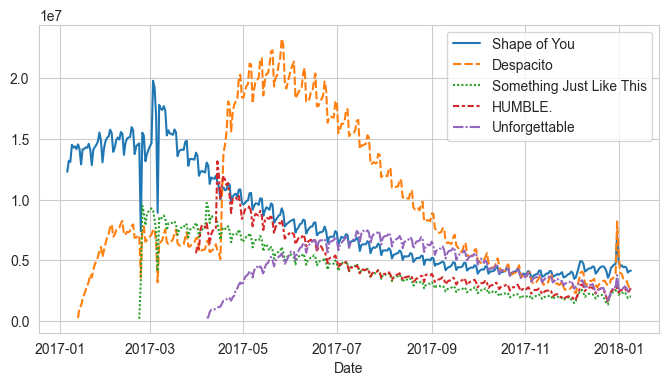

In [86]:
# Change the style of the figure
sns.set_style("whitegrid")

# Line chart 
plt.figure(figsize=(8,4))
sns.lineplot(data=spotify_data)

# Chapter 7. Final Project
## 1. Loading the data

In [89]:
# Fill in the line below: Specify the path of the CSV file to read
my_filepath = "input/archive/dc-wikia-data.csv"
# Fill in the line below: Read the file into a variable my_data
dc_data = pd.read_csv(my_filepath, index_col='page_id')


In [90]:
dc_data.head()

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
page_id,,,,,,,,,,,,
1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [126]:
dc_data.shape

(6896, 12)

In [139]:
len(dc_data.name.unique())

6896

In [144]:
dc_data[['name', 'APPEARANCES', 'YEAR']].sort_values(by='APPEARANCES', ascending=False).head(10)

,name,APPEARANCES,YEAR
page_id,,,
1422,Batman (Bruce Wayne),3093.0,1939.0
23387,Superman (Clark Kent),2496.0,1986.0
1458,Green Lantern (Hal Jordan),1565.0,1959.0
1659,James Gordon (New Earth),1316.0,1987.0
1576,Richard Grayson (New Earth),1237.0,1940.0
1448,Wonder Woman (Diana Prince),1231.0,1941.0
1486,Aquaman (Arthur Curry),1121.0,1941.0
1451,Timothy Drake (New Earth),1095.0,1989.0
71760,Dinah Laurel Lance (New Earth),1075.0,1969.0


## 2. Analysis


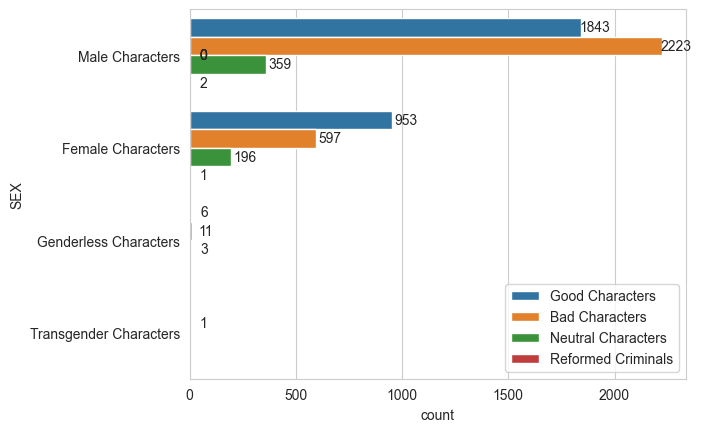

In [106]:
ax = sns.countplot(y='SEX', data=dc_data, hue='ALIGN')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (10, 0), 
                textcoords = 'offset points')

plt.legend(loc='lower right')
plt.show()

/Users/ivanivani/Library/Python/3.9/lib/python/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


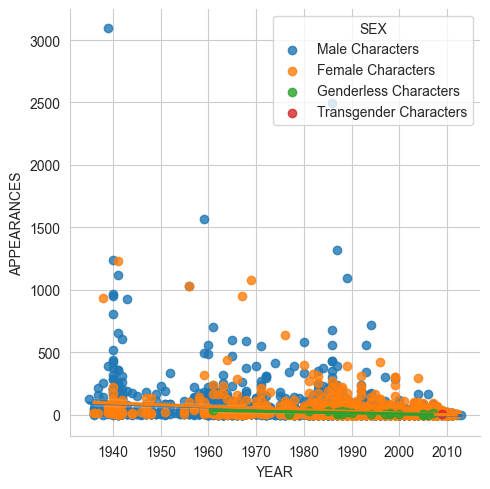

In [124]:
# Change the style of the figure
sns.set_style("whitegrid")
ax = sns.lmplot(x = 'YEAR', y='APPEARANCES', hue='SEX', data=dc_data, legend=True, legend_out=False, )
plt.show()

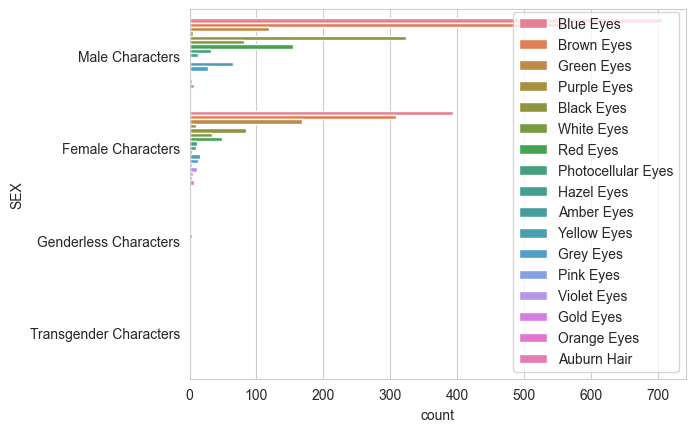

In [125]:
ax = sns.countplot(y='SEX', data=dc_data, hue='EYE')

plt.legend(loc='lower right')
plt.show()